# Assignment 4

Nicolas Larrañaga Cifuentes - Jonathan Alberto Ortiz Rodriguez

In [5]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline

# 1.a

In [6]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def relu(x):
    if x>= 0 :
        return x
    else :
        return 0;
    
def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
           0   1   2    3    4    5    6
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    
    # your code here
    
    #activation for neuron 5
    a[4]= x
    z[4]= x
    #activation for neuron 4
    a[3]= w[6] * z[4]
    z[3] = sigmoid(a[3])
    #activation for neuron 3 
    a[2] = w[5] * z[4]
    z[2] = sigmoid(a[2])
    #activation for neuron 2 
    a[1] = w[3] * z[2] + w[4]*z[3]
    z[1] = relu(a[1])
    #activation for neuron 1
    a[0] = w[0]*z[2] + w[1]*z[1] + w[2]*z[3]
    z[0] = sigmoid(a[0])

    return (a, z)


#(a,z)=forward_propagate(x, w)
#print (a)
#print (z)

# 1.b

In [7]:
def error(expected , real):
    return (expected - real)**2

def derivate_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def derivate_relu(x):
    if x>= 0:
        return 1;
    else :
        return 0;

    
def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
         0    1    2    3    4    5    6
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    # neuron 1
    delta[0] = 2 * (y-z[0]) * (-z[0]) * (1-z[0])
    # neuron 2    
    delta[1] = derivate_relu(a[1]) * delta [0] * w[1]
    # neuron 3
    delta[2] = derivate_sigmoid(a[2]) * (delta[1]*w[3] + delta[0]*w[0])
    # neuron 4 
    delta[3] = derivate_sigmoid(a[3]) * (delta[1]*w[4] + delta[0]*w[2])
    # neuron 5
    delta[4] = derivate_sigmoid(a[4])* (delta[2]*w[5] + delta[3]*w[6])
    return delta




#y=0.731204118803
#delta=bp(x,y,w)
#print (delta)


# 1.c

In [8]:
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
         0    1    2    3    4     5   6
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    # Your code here
    dw = np.zeros(7)
    #w53
    dw[5] = delta[2] * z[4]
    #w54
    dw[6] = delta[3] * z[4]
    #w32
    dw[3] = delta[1] * z[2]
    #w42
    dw[4] = delta[1] * z[3]
    #w31
    dw[0] = delta[0] * z[2]
    #w21
    dw[1] = delta[0] * z[1]
    #w41
    dw[2] = delta[0] * z[3]
    
    w = w - eta*dw
    return w
#eta=0.5
#updated_w=train_step(x,y,w,eta)
#print(updated_w)

Text(0.5,1,'prediction')

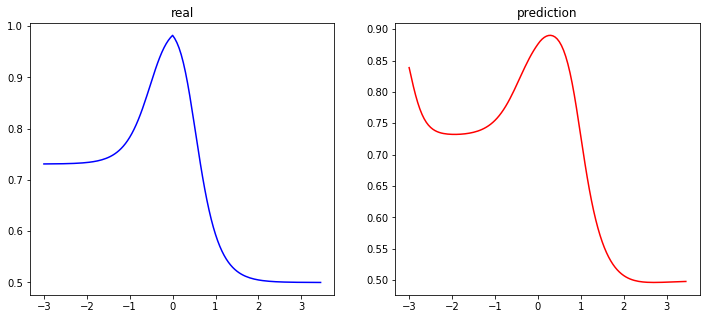

In [48]:
file = open("samples_assign4.txt", "r") 
x = []
y = []
for line in file:
    if( line == "\n" ): continue
    u,v = line.split()
    x.append(u)
    y.append(v)
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

# lets train 
# assuming
# random values for the weihgts from -1 to 1 
N = len(x)
w= np.zeros(7);

for i in range(7):
    w[i]=np.random.uniform(-2.0,2.0)

eta=0.7
predictions=[]
for i in range(N):
    (a,z)=forward_propagate(x[i], w)
    predictions.append(z[0])
    delta=bp(x,y[i],w)
    updated_w= train_step(x, y, w, eta)    
    w=updated_w

fig = plt.figure( figsize = (12,5) )
ax1 = fig.add_subplot(121)
ax1.plot( x,y,'b')
ax1.set_title("real")

ax2 = fig.add_subplot(122)
ax2.plot(x,predictions,'r')
ax2.set_title("prediction")
#ax2.title("predictions")


### conclusion 
since weights are initialized randomly sometimes its predictions are very unsuccessful its depens also in the learning rate, if too low it gives almost a linear predictns if too high , nearly 1 it gives a pretty nice prediction

# 3.1

In [55]:
import numpy as np
import urllib
from matplotlib import pyplot as plt
import random
import sys

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.layers.wrappers import TimeDistributed
from keras.applications import mobilenet
from keras.applications.mobilenet import preprocess_input, decode_predictions
from PIL import Image, ImageFile
from keras.preprocessing.image import img_to_array as preprocess_image
from tabulate import tabulate
from keras import optimizers
from sklearn.utils import shuffle
from keras.utils.generic_utils import CustomObjectScope


__PATH = 'birds/'
birds = ['egret', 'mandarin', 'owl', 'puffin', 'toucan', 'wood_duck']
__NUMBER_OF_SAMPLES = 101
__EXTENSION = '.jpg'
__SIZE = (224, 224)

def get_string_digit(n):
    if n < 10:
        return '00' + str(n)
    elif n <100:
        return '0' + str(n)
    else:
        return str(n)
def get_prefix(name):
    return 'wod' if name == 'wood_duck' else name[:3]

In [56]:
model = mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

ImportError: `load_weights` requires h5py.